### 导入所用的包

In [1]:
import numpy as np
import tensorflow_datasets as tfds
from PIL import Image
from IPython import display

### 将读取的结果保存为GIF格式，并返回GIF格式数据

In [2]:
def as_gif(images, path='temp.gif'):
    """将一组图片保存为GIF格式，并读取"""
    images[0].save(path, save_all=True, append_images=images[1:], duration=100, loop=0)
    # duration:每一帧之间的时间间隔(ms)，loop:循环次数，0为一直循环
    gif_bytes = open(path, 'rb').read()
    # 读取GIF文件
    return gif_bytes

### 读取数据集中的数据

In [3]:
dataset = 'columbia_cairlab_pusht_real-test' # 数据集名称
display_key = 'image' # 用于查看features文件中'observation'是否含有'image'

builder = tfds.builder_from_directory(
    builder_dir='D:/Dataset/columbia_cairlab_pusht_real/0.1.0')
# 注意"/""，不能用"\"
# tfds.builder_from_directory 函数根据 dataset_info.json 下载数据并创建一个 tfds.core.DatasetBuilder
# 数据会根据 features.json 文件内容进行解析
# builder的数据类型见 block[5]

if display_key not in builder.info.features['steps']['observation']:
    """如果'observation'中不存在'image'，则抛出ValueError"""
    raise ValueError(
        f'The key {display_key} was not found in this dataset.\n'
        + 'Please choose a different image key to display for this dataset.\n'
        + 'Here is the observation spec:\n'
        + str(builder.info.features['steps']['observation']))

ds = builder.as_dataset(split='train[:10]').shuffle(10)
# as_dataset 将一个 tfds.core.DatasetBuilder 对象转换为一个 tf.data.Dataset 对象
# split='train[:10]' 加载训练集的前 10 个样本，shuffle 将其打乱
# 该数据集共 122 个样本，见 block[10]

### 可视化其中的数据

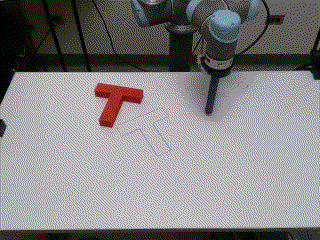

### 过程参数分析

In [5]:
# builder的数据类型
builder

In [6]:
builder.info

tfds.core.DatasetInfo(
    name='columbia_cairlab_pusht_real',
    full_name='columbia_cairlab_pusht_real/0.1.0',
    description="""
    UR5 planar pushing tasks
    """,
    homepage='https://github.com/columbia-ai-robotics/diffusion_policy',
    data_dir='D:/Dataset/columbia_cairlab_pusht_real/0.1.0',
    file_format=tfrecord,
    download_size=Unknown size,
    dataset_size=2.80 GiB,
    features=FeaturesDict({
        'steps': Dataset({
            'action': FeaturesDict({
                'gripper_closedness_action': float32,
                'rotation_delta': Tensor(shape=(3,), dtype=float32),
                'terminate_episode': float32,
                'world_vector': Tensor(shape=(3,), dtype=float32),
            }),
            'is_first': bool,
            'is_last': bool,
            'is_terminal': bool,
            'observation': FeaturesDict({
                'image': Image(shape=(240, 320, 3), dtype=uint8),
                'natural_language_embedding': Tensor(shape=(512,)

In [7]:
builder.info.features
# 一个大字典，字典里面嵌套字典

FeaturesDict({
    'steps': Dataset({
        'action': FeaturesDict({
            'gripper_closedness_action': float32,
            'rotation_delta': Tensor(shape=(3,), dtype=float32),
            'terminate_episode': float32,
            'world_vector': Tensor(shape=(3,), dtype=float32),
        }),
        'is_first': bool,
        'is_last': bool,
        'is_terminal': bool,
        'observation': FeaturesDict({
            'image': Image(shape=(240, 320, 3), dtype=uint8),
            'natural_language_embedding': Tensor(shape=(512,), dtype=float32),
            'natural_language_instruction': string,
            'robot_state': Tensor(shape=(2,), dtype=float32),
            'wrist_image': Image(shape=(240, 320, 3), dtype=uint8),
        }),
        'reward': Scalar(shape=(), dtype=float32),
    }),
})

In [8]:
builder.info.features['steps']
# 数据类型为数据集，对应每一个 step 的数据

Dataset({
    'action': FeaturesDict({
        'gripper_closedness_action': float32,
        'rotation_delta': Tensor(shape=(3,), dtype=float32),
        'terminate_episode': float32,
        'world_vector': Tensor(shape=(3,), dtype=float32),
    }),
    'is_first': bool,
    'is_last': bool,
    'is_terminal': bool,
    'observation': FeaturesDict({
        'image': Image(shape=(240, 320, 3), dtype=uint8),
        'natural_language_embedding': Tensor(shape=(512,), dtype=float32),
        'natural_language_instruction': string,
        'robot_state': Tensor(shape=(2,), dtype=float32),
        'wrist_image': Image(shape=(240, 320, 3), dtype=uint8),
    }),
    'reward': Scalar(shape=(), dtype=float32),
})

In [9]:
builder.info.features['steps']['observation']

FeaturesDict({
    'image': Image(shape=(240, 320, 3), dtype=uint8),
    'natural_language_embedding': Tensor(shape=(512,), dtype=float32),
    'natural_language_instruction': string,
    'robot_state': Tensor(shape=(2,), dtype=float32),
    'wrist_image': Image(shape=(240, 320, 3), dtype=uint8),
})

In [10]:
num_samples = len(builder.as_dataset(split='train[0:]'))
num_samples

122

In [11]:
episode # 对应 builder.info.features 中的数据

{'steps': <_VariantDataset element_spec={'action': {'gripper_closedness_action': TensorSpec(shape=(), dtype=tf.float32, name=None), 'rotation_delta': TensorSpec(shape=(3,), dtype=tf.float32, name=None), 'terminate_episode': TensorSpec(shape=(), dtype=tf.float32, name=None), 'world_vector': TensorSpec(shape=(3,), dtype=tf.float32, name=None)}, 'is_first': TensorSpec(shape=(), dtype=tf.bool, name=None), 'is_last': TensorSpec(shape=(), dtype=tf.bool, name=None), 'is_terminal': TensorSpec(shape=(), dtype=tf.bool, name=None), 'observation': {'image': TensorSpec(shape=(240, 320, 3), dtype=tf.uint8, name=None), 'natural_language_embedding': TensorSpec(shape=(512,), dtype=tf.float32, name=None), 'natural_language_instruction': TensorSpec(shape=(), dtype=tf.string, name=None), 'robot_state': TensorSpec(shape=(2,), dtype=tf.float32, name=None), 'wrist_image': TensorSpec(shape=(240, 320, 3), dtype=tf.uint8, name=None)}, 'reward': TensorSpec(shape=(), dtype=tf.float32, name=None)}>}

In [12]:
episode['steps'] 
# 对应 builder.info.features['steps'] 中的数据
# 数据类型为数据集，对应每一个 step 的数据

<_VariantDataset element_spec={'action': {'gripper_closedness_action': TensorSpec(shape=(), dtype=tf.float32, name=None), 'rotation_delta': TensorSpec(shape=(3,), dtype=tf.float32, name=None), 'terminate_episode': TensorSpec(shape=(), dtype=tf.float32, name=None), 'world_vector': TensorSpec(shape=(3,), dtype=tf.float32, name=None)}, 'is_first': TensorSpec(shape=(), dtype=tf.bool, name=None), 'is_last': TensorSpec(shape=(), dtype=tf.bool, name=None), 'is_terminal': TensorSpec(shape=(), dtype=tf.bool, name=None), 'observation': {'image': TensorSpec(shape=(240, 320, 3), dtype=tf.uint8, name=None), 'natural_language_embedding': TensorSpec(shape=(512,), dtype=tf.float32, name=None), 'natural_language_instruction': TensorSpec(shape=(), dtype=tf.string, name=None), 'robot_state': TensorSpec(shape=(2,), dtype=tf.float32, name=None), 'wrist_image': TensorSpec(shape=(240, 320, 3), dtype=tf.uint8, name=None)}, 'reward': TensorSpec(shape=(), dtype=tf.float32, name=None)}>

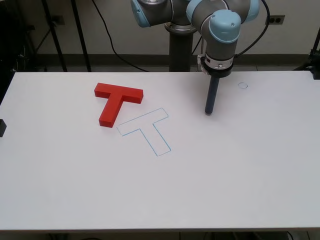

In [13]:
# 查看 episode['steps'] 中的 'image' 数据 
a = next(iter(episode['steps']))
i = a['observation'][display_key]
Image.fromarray(i.numpy())

In [14]:
len(images1), images1

(163,
 [<tf.Tensor: shape=(240, 320, 3), dtype=uint8, numpy=
  array([[[84, 81, 73],
          [84, 82, 71],
          [66, 65, 51],
          ...,
          [99, 98, 95],
          [99, 98, 95],
          [99, 98, 95]],
  
         [[36, 34, 24],
          [21, 18, 12],
          [16, 14, 11],
          ...,
          [99, 97, 95],
          [99, 97, 95],
          [99, 97, 95]],
  
         [[15, 14,  6],
          [15, 14,  5],
          [13, 13,  2],
          ...,
          [99, 97, 95],
          [99, 97, 95],
          [99, 97, 95]],
  
         ...,
  
         [[48, 50, 41],
          [48, 50, 41],
          [48, 49, 41],
          ...,
          [51, 55, 44],
          [51, 54, 43],
          [51, 54, 43]],
  
         [[47, 50, 41],
          [47, 50, 41],
          [47, 49, 40],
          ...,
          [51, 55, 43],
          [50, 54, 43],
          [50, 54, 43]],
  
         [[47, 50, 41],
          [47, 50, 41],
          [47, 49, 40],
          ...,
          [51, 55, 4

In [15]:
type(images1[0].numpy()), type(Image.fromarray(images1[0].numpy()))

(numpy.ndarray, PIL.Image.Image)